In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

In [5]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [7]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

In [9]:
# Getting Start and End Date of the DataFrames
print(BAC.index[0])
print(BAC.index[-1])

2016-09-06 00:00:00
2021-09-03 00:00:00


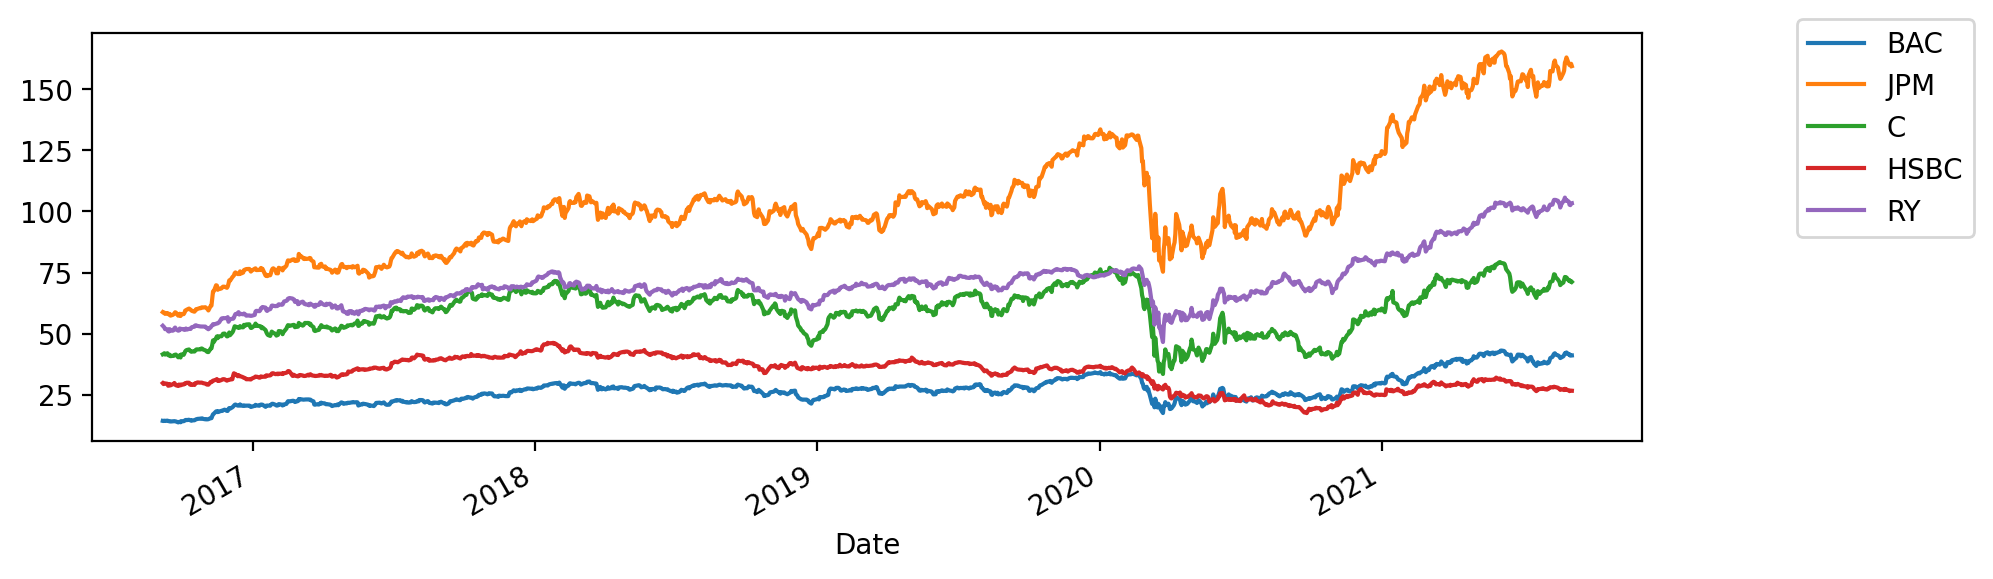

In [33]:
#Creating a line Plot showing the Adjusted Close of the Stocks
plt.figure(figsize=(10,3),dpi=200)
BAC['Adj Close'].plot(label='BAC')
JPM['Adj Close'].plot(label='JPM')
C['Adj Close'].plot(label='C')
HSBC['Adj Close'].plot(label="HSBC")
RY['Adj Close'].plot(label="RY")
plt.legend(loc=(1.1,0.5))

In [69]:
# Creating a function that calculates the Percent Change between two given input times
def perc_calc(ticker,start_date,end_date):
    if start_date not in ticker['Adj Close'].index or end_date not in ticker['Adj Close'].index:
        return f"Start or End Date not in index of Series"
    return 100* (ticker['Adj Close'][end_date] - ticker['Adj Close'][start_date]) / ticker['Adj Close'][start_date]

In [71]:
perc_calc(BAC,'2016-09-06','2021-09-03')

187.73603116885738

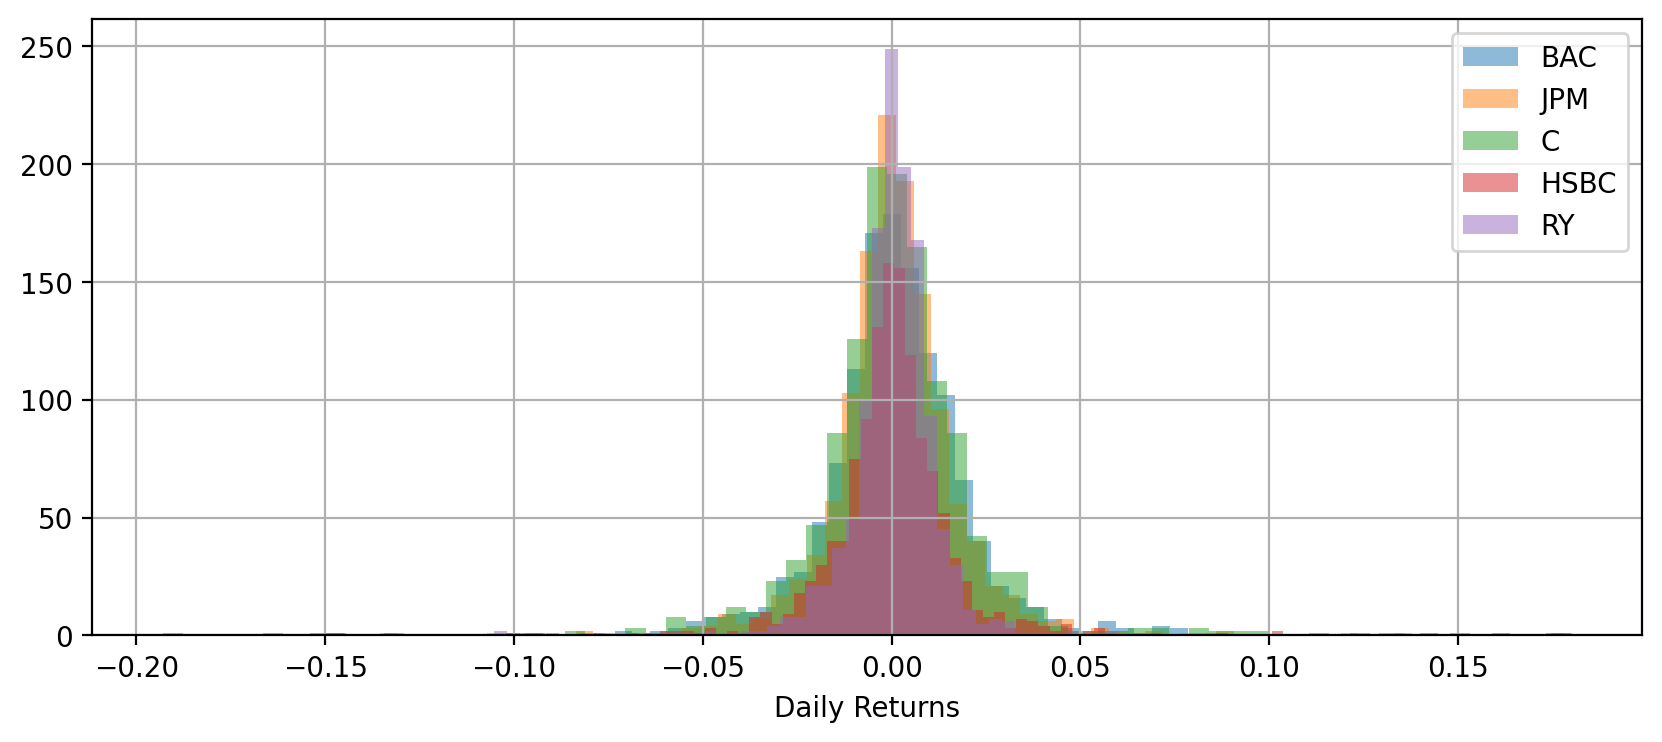

In [78]:
#Creating a Histogram of the Daily Returns for each Stock in the Portfolio

plt.figure(dpi=200,figsize=(10,4))

for stock_name,stock_df in portfolio_dict.items():
    stock_df['Adj Close'].pct_change(1).hist(label = stock_name, alpha=0.5, bins=70)

plt.xlabel("Daily Returns")
plt.legend()

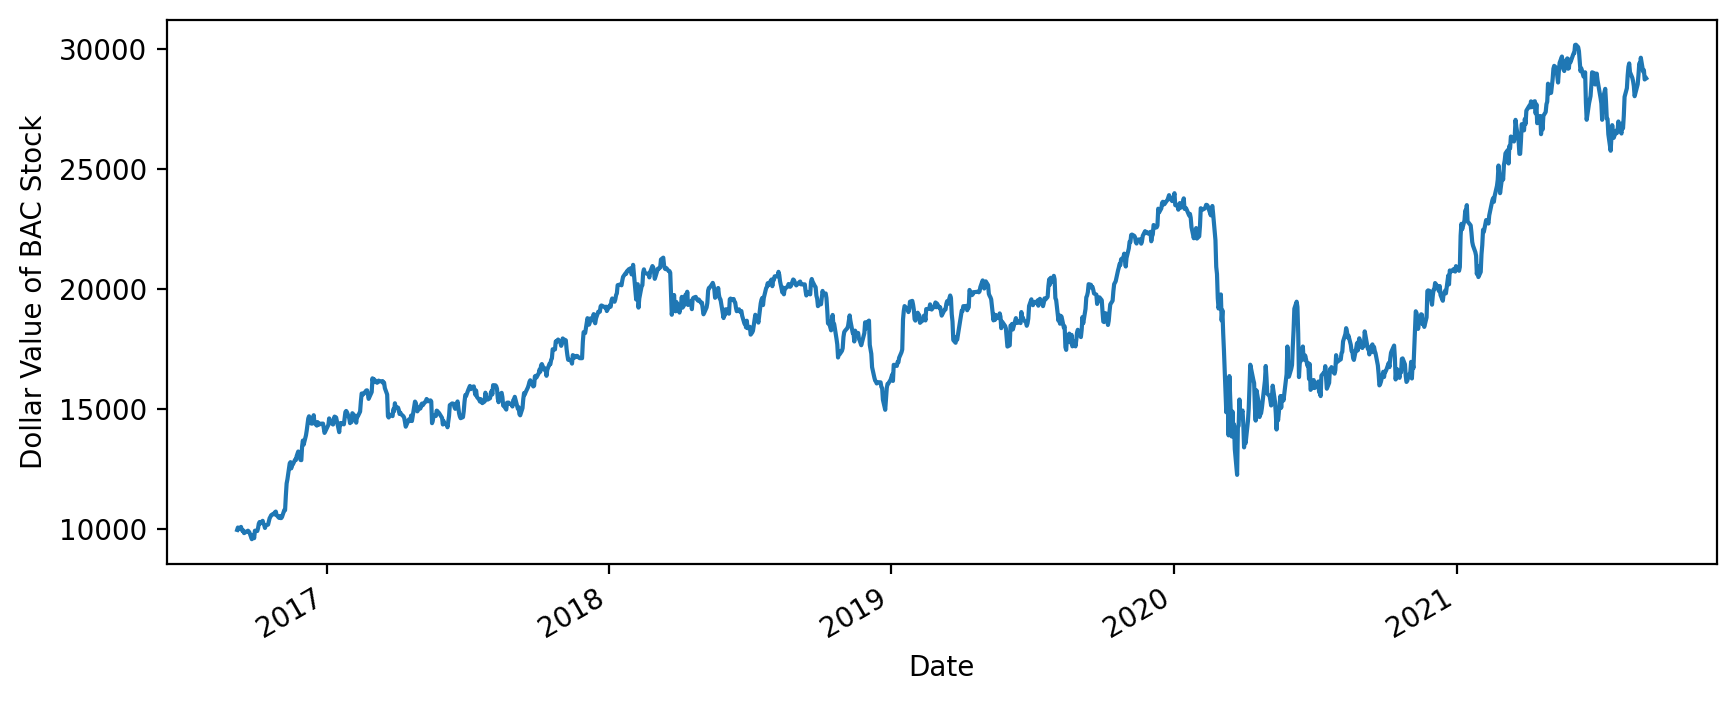

In [91]:
# Creating a plot that shows what $10.000 in BAC would have been over the years

bac_rets = BAC['Adj Close'].pct_change(1)[1:]
cumulative_ret = (bac_rets + 1).cumprod()
bac_10000 = cumulative_ret*10000

plt.figure(dpi=200,figsize=(10,4))
bac_10000.plot(ylabel='Dollar Value of BAC Stock');

In [93]:
#Finding the Annualized Sharpe Ratios for each stock in the portfolio.
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return (252**0.5) *sharpe_ratio

In [95]:
for ticker,df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783101
JPM Annualized Sharpe Ratio is: 0.8165069200136574
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


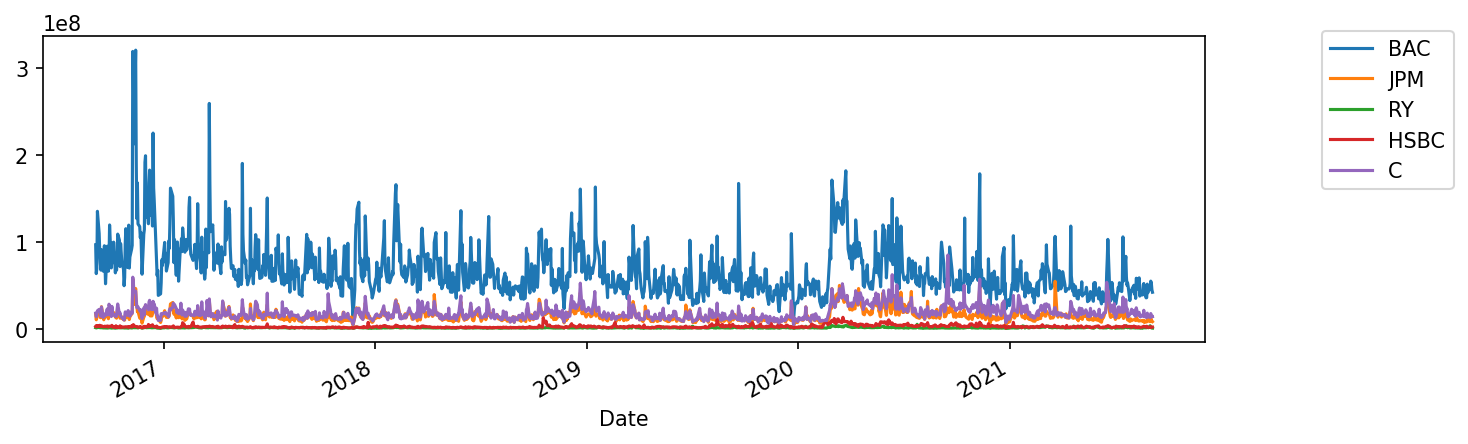

In [97]:
#Creating a Plot showing the daily volume of a stock traded over the time period of 5 years
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
BAC['Volume'].plot(ax=ax,label='BAC')
JPM['Volume'].plot(ax=ax,label='JPM')
RY['Volume'].plot(ax=ax,label='RY')
HSBC['Volume'].plot(ax=ax,label='HSBC')
C['Volume'].plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

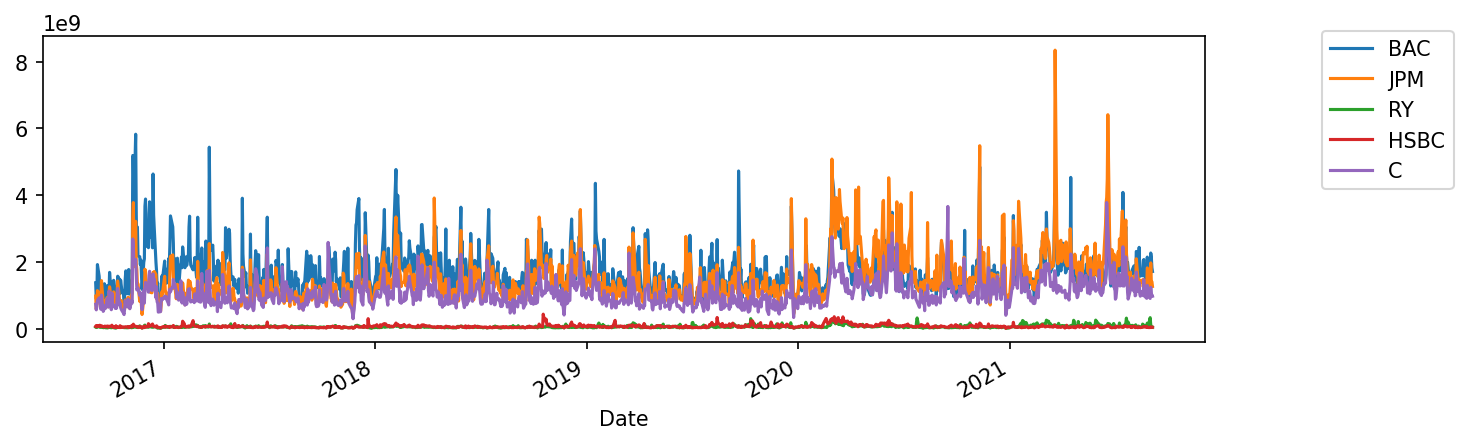

In [99]:
#Making the Plot reflect the total dollar amount of the shares traded
fig,ax = plt.subplots(dpi=150,figsize=(10,3))
(BAC['Volume']*BAC['Adj Close']).plot(ax=ax,label='BAC')
(JPM['Volume']*JPM['Adj Close']).plot(ax=ax,label='JPM')
(RY['Volume']*RY['Adj Close']).plot(ax=ax,label='RY')
(HSBC['Volume']*HSBC['Adj Close']).plot(ax=ax,label='HSBC')
(C['Volume']*C['Adj Close']).plot(ax=ax,label='C')
plt.legend(loc=(1.1,0.5))

In [101]:
#Maximum total $ traded
(JPM['Volume']*JPM['Adj Close']).max()

8345011203.784801

In [103]:
#Time it occurred
(JPM['Volume']*JPM['Adj Close']).idxmax()

Timestamp('2021-03-19 00:00:00')

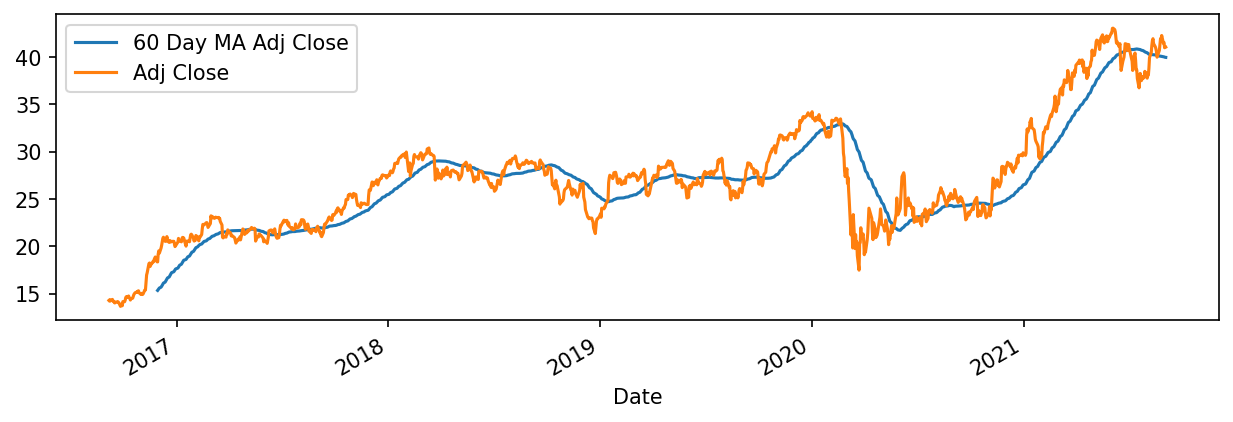

In [105]:
#Creating a plot showing the Adj.Close of BAC and a 60 Day MA
plt.figure(figsize=(10,3),dpi=150)
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day MA Adj Close')
BAC['Adj Close'].plot(label='Adj Close')
plt.legend()

<Axes: xlabel='Date'>

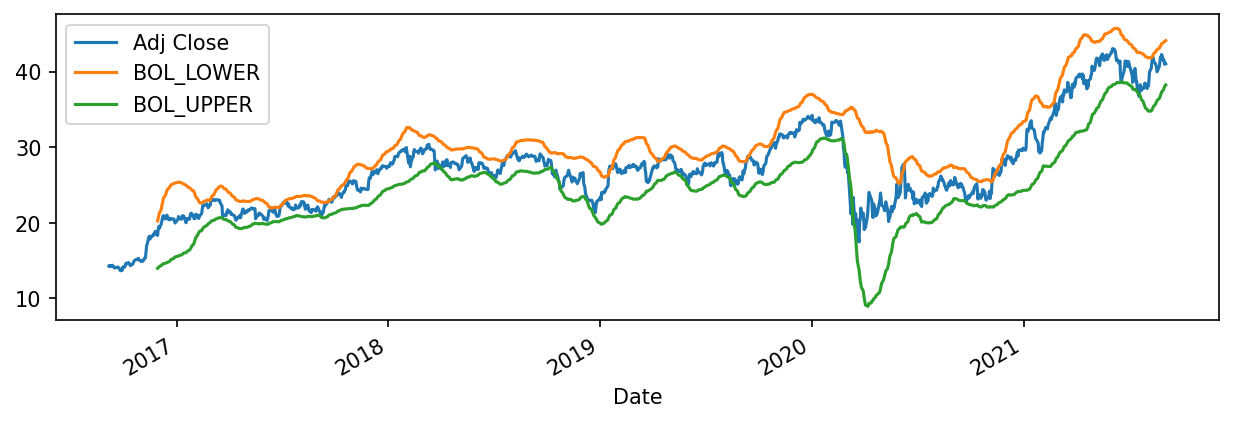

In [107]:
#Creating Bollinger Bands of BAC
fig,ax = plt.subplots(figsize=(10,3), dpi=150)
BAC['MA'] =BAC['Adj Close'].rolling(window=20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(window=60).std()
BAC['BOL_LOWER'] = BAC['MA'] + 2*BAC['STD']
BAC['BOL_UPPER'] = BAC['MA'] - 2*BAC['STD']
BAC[['Adj Close','BOL_LOWER','BOL_UPPER']].plot(ax=ax)